In [158]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [159]:
data = pd.read_csv('train.tsv', index_col= None, header = None, sep = '\t', quoting=csv.QUOTE_NONE)
data.head(13)

,0,1,2,3,4,5,6,7
0,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",0,не могу .,good,0.875352
1,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",1,"нет , звонить буду я .",neutral,0.900968
2,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",2,"слушай , я не мог уйти .",bad,0.884320
3,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",3,я не прекращу звонить .,good,0.982530
4,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",4,я звоню им .,good,0.838054
5,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",5,просто повесь трубку .,bad,0.955718
6,50117448291,бывало и получше .,"слушайте , мы с женой . . . совсем заблудились .","я пытаюсь добраться до юджина , но , кажется ,...",0,едете ?,bad,0.909115
7,50117448291,бывало и получше .,"слушайте , мы с женой . . . совсем заблудились .","я пытаюсь добраться до юджина , но , кажется ,...",1,едем .,bad,0.984621
8,50117448291,бывало и получше .,"слушайте , мы с женой . . . совсем заблудились .","я пытаюсь добраться до юджина , но , кажется ,...",2,"куда же вы едете , месье ?",good,0.833307
9,50117448291,бывало и получше .,"слушайте , мы с женой . . . совсем заблудились .","я пытаюсь добраться до юджина , но , кажется ,...",3,"берите бутылку , а мы такси .",good,0.800272


<h1>Make Global Features</h1>

In [160]:
from string import punctuation

def make_words(s):
    s = ''.join(c for c in s if c not in punctuation)
    return s.split()

In [161]:
data = data.assign(num_words = np.array([len(make_words(x)) for x in data[5].values]))
data.head()

,0,1,2,3,4,5,6,7,num_words
0,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",0,не могу .,good,0.875352,2
1,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",1,"нет , звонить буду я .",neutral,0.900968,4
2,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",2,"слушай , я не мог уйти .",bad,0.884320,5
3,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",3,я не прекращу звонить .,good,0.982530,4
4,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",4,я звоню им .,good,0.838054,3


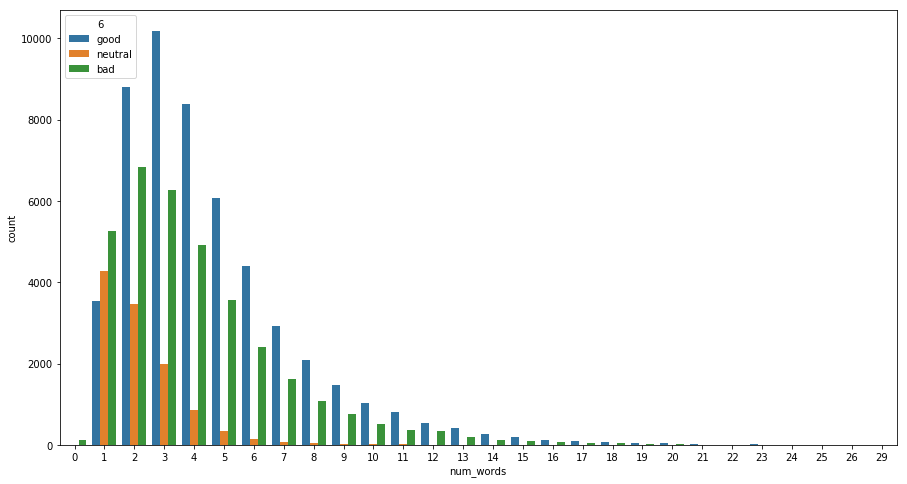

In [162]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='num_words', hue=6, data=data)

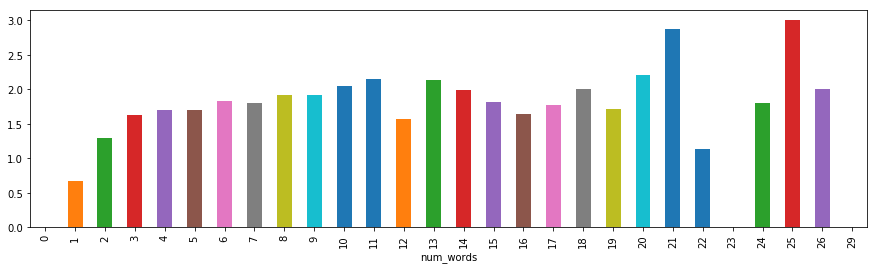

In [163]:
plt.figure(figsize=(15,4))
(data[data[6]=='good'].groupby(['num_words'])[6].count() / 
 data[data[6]=='bad'].groupby(['num_words'])[6].count()).plot(kind = 'bar')

In [164]:
##Сделать:
#num_unique
#num_intersections
#averages for each interaction
def count_intersections(a, b):
    res = []
    for i in range(len(a)):
        set_a = set(make_words(a[i]))
        set_b = set(make_words(b[i]))
        res.append(len(set_a.intersection(set_b)))
    return res

In [165]:
data = data.assign(num_intersections = np.array(count_intersections(data[5], data[3])))
data.head()

,0,1,2,3,4,5,6,7,num_words,num_intersections
0,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",0,не могу .,good,0.875352,2,0
1,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",1,"нет , звонить буду я .",neutral,0.900968,4,0
2,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",2,"слушай , я не мог уйти .",bad,0.884320,5,0
3,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",3,я не прекращу звонить .,good,0.982530,4,0
4,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",4,я звоню им .,good,0.838054,3,0


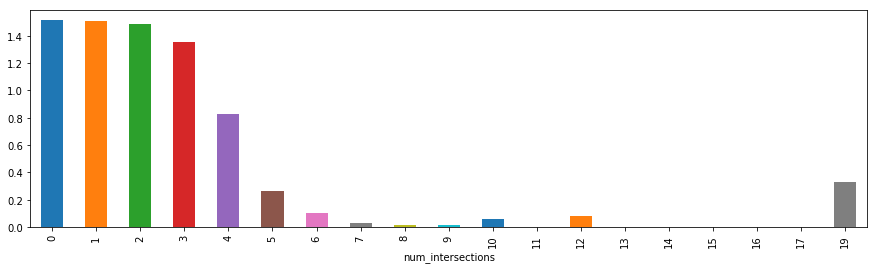

In [166]:
plt.figure(figsize=(15,4))
(data[data[6]=='good'].groupby(['num_intersections'])[6].count() / 
 data[data[6]=='bad'].groupby(['num_intersections'])[6].count()).plot(kind = 'bar')

In [167]:
def word_frequency(a):
    words_dict = {}
    for i in range(len(a)):
        for word in make_words(a[i]):
            try:
                words_dict[word] += 1
            except:
                words_dict[word] = 1
    for key in words_dict:
        words_dict[key] = 1 / words_dict[key] 
    return words_dict
                
def average_unique(dict_array, our_array):
    res = []
    word_dict = word_frequency(dict_array)
    for i in range(len(our_array)):
        words = make_words(our_array[i])        
        if len(words) > 0:
            res.append(np.mean([word_dict[word] if word in word_dict else 1 for word in words]))
        else:
            res.append(0)
    return res

In [168]:
data = data.assign(average_unique = np.array(average_unique(data[5], data[5])))
data.head()

,0,1,2,3,4,5,6,7,num_words,num_intersections,average_unique
0,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",0,не могу .,good,0.875352,2,0,0.000508
1,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",1,"нет , звонить буду я .",neutral,0.900968,4,0,0.007181
2,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",2,"слушай , я не мог уйти .",bad,0.884320,5,0,0.005764
3,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",3,я не прекращу звонить .,good,0.982530,4,0,0.017477
4,22579918886,"кликни на меня а потом на надпись "" видео - зв...","о , я тебя вижу .","ладно , повесь трубку .",4,я звоню им .,good,0.838054,3,0,0.048946


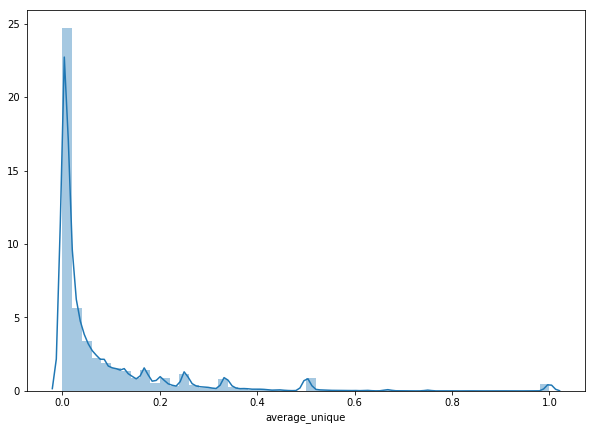

In [169]:
plt.figure(figsize=(10,7))
ax = sns.distplot(data.average_unique)

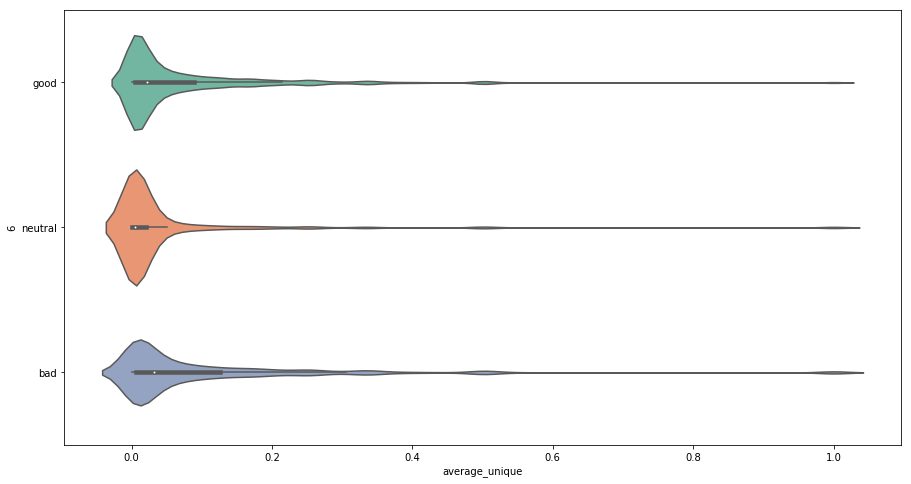

In [170]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="average_unique", y = 6, data=data, palette="Set2")

<h1>Logistic Regression with count vectorizer</h1>

In [208]:
from tqdm import tqdm
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def normal_forms(series):
    a = []
    for sentence in tqdm(series):
        res = ''
        for word in make_words(sentence):
            res += morph.parse(word)[0].normal_form + ' '
        a.append(res)
    return np.array(a)

In [209]:
data = data.assign(normalized = normal_forms(data[5]))


  2%|▏         | 1604/97533 [00:01<01:58, 806.52it/s]Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 893, in __del__
    self.close()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 1123, in close
    fp_write('')
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 1120, in fp_write
    self.fp.write(_unicode(s))
AttributeError: 'float' object has no attribute 'write'
  2%|▏         | 1688/97533 [00:02<01:59, 802.94it/s]Exception in thread Thread-24:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████|

In [210]:
def accuracy(a, b):
    tmp = 0
    for i in range(len(a)):
        if int(a[i]) == int(b[i]):
            tmp += 1
    return tmp / len(a)

In [234]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range = (1, 3), max_features=100000)
vect_df = vect.fit_transform(data.normalized)
vect2 = CountVectorizer(ngram_range = (1, 3), max_features=10000)
vect2_df = vect2.fit_transform(data.normalized)
len(vect.vocabulary_)

CPU times: user 5.37 s, sys: 40 ms, total: 5.41 s
Wall time: 5.41 s


In [235]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(vect_df, y, test_size = 0.2, shuffle = True, random_state = 179)
X_test, X_final, y_test, y_final = train_test_split(X_test, y_test, test_size = 0.2, shuffle = True, random_state = 57)

In [236]:
%%time
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.2, multi_class = 'multinomial', random_state = 179, solver = 'saga')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy(pred, y_test))
data = data.assign(cv_pred = lr.predict(vect_df))
data = data.assign(cv_pred0 = lr.predict_proba(vect_df)[:,0])
data = data.assign(cv_pred1 = lr.predict_proba(vect_df)[:,1])
data = data.assign(cv_pred2 = lr.predict_proba(vect_df)[:,2])

0.569048381928869
CPU times: user 9.18 s, sys: 20 ms, total: 9.2 s
Wall time: 9.24 s


In [238]:
%%time

X_train, X_test, y_train, y_test = train_test_split(vect2_df, y, test_size = 0.2, shuffle = True, random_state = 179)
X_test, X_final, y_test, y_final = train_test_split(X_test, y_test, test_size = 0.2, shuffle = True, random_state = 57)
lr2 = LogisticRegression(C = 0.2, multi_class = 'multinomial', random_state = 179, solver = 'saga')
lr2.fit(X_train, y_train)
pred = lr2.predict(X_test)
print(accuracy(pred, y_test))
data = data.assign(scv_pred = lr2.predict(vect2_df))
data = data.assign(scv_pred0 = lr2.predict_proba(vect2_df)[:,0])
data = data.assign(scv_pred1 = lr2.predict_proba(vect2_df)[:,1])
data = data.assign(scv_pred2 = lr2.predict_proba(vect2_df)[:,2])

0.5641781480294777
CPU times: user 6.67 s, sys: 0 ns, total: 6.67 s
Wall time: 6.67 s


<h1>Prepare data for Boosting</h1>

In [239]:
new_df = data.drop([0, 1, 2, 3, 4, 5, 6, 7, 'normalized'], axis = 1)
y = data[6]
new_df.head()

,num_words,num_intersections,average_unique,cv_pred,cv_pred0,cv_pred1,cv_pred2,scv_pred,scv_pred0,scv_pred1,scv_pred2
0,2,0,0.000508,1,0.335241,0.392117,0.272642,1,0.342748,0.395751,0.261501
1,4,0,0.007181,0,0.457721,0.456674,0.085606,1,0.386950,0.571389,0.041661
2,5,0,0.005764,1,0.266996,0.571044,0.161959,1,0.264561,0.589813,0.145626
3,4,0,0.017477,1,0.176671,0.757400,0.065929,1,0.192106,0.741086,0.066808
4,3,0,0.048946,1,0.417968,0.537542,0.044490,1,0.436919,0.518950,0.044131


In [240]:
grouped = data.groupby(0).num_words.mean()
new_df = new_df.assign(average_words = [grouped[key] for key in data[0].values])
grouped = data.groupby(0).num_intersections.mean()
new_df = new_df.assign(average_intersections = [grouped[key] for key in data[0].values])
grouped = data.groupby(0).average_unique.mean()
new_df = new_df.assign(avg_average_unique = [grouped[key] for key in data[0].values])

<h1>Polinomial features</h1>

In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from multiprocessing import Process
from datetime import datetime
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder 
coef = 0.95

def calc():
    features = {'feature_1': [],
                'feature_2': [],
                'pow_a': [],
                'pow_b': [],
                'std1': [],
                'std2': [],
                'sign': []
               }
    features = pd.DataFrame(features)
    for feature1 in X_old.columns:
        for feature2 in X_old.columns:

            tmp = (X_old[feature1]/X_old[feature1].std())** a / ((X_old[feature2]/X_old[feature2].std())**b + 1e-6)
            cor = pearsonr(y_train, tmp[y_train])[0]
            if cor > coef:
                X_hui[feature1 + '__' + feature2 + '__' + str(a) + '/' + str(b)] = tmp
                features = features.append({'feature_1': feature1,
                                            'feature_2': feature2,
                                            'pow_a': str(a),
                                            'pow_b': str(b),
                                            'std1': X_old[feature1].std(),
                                            'std2': X_old[feature2].std(),
                                            'sign': '/'}, ignore_index=True)    

            tmp = (X_old[feature1]/X_old[feature1].std())** a * ((X_old[feature2]/X_old[feature2].std())**b)
            cor = pearsonr(y_train, tmp[y_train])[0]
            if cor > coef:
                X_hui[feature1 + '__' + feature2 + '__' + str(a) + '*' + str(b)] = tmp
                features = features.append({'feature_1': feature1,
                                            'feature_2': feature2,
                                            'pow_a': str(a),
                                            'pow_b': str(b),
                                            'std1': X_old[feature1].std(),
                                            'std2': X_old[feature2].std(),
                                            'sign': '*'}, ignore_index=True)
    X_pol = X_hui.drop([0], axis = 1)
    X_pol.to_csv('data/tmp/polinom_cor_{}_{}.csv'.format(a, b))
    features.to_csv('data/tmp/polinom_features_{}_{}.csv'.format(a, b))
    print('Process {} - {} finished with {} features and took {}'.format(a, b, X_hui.shape[1], datetime.now()-start))

X_old = new_df[['num_words', 'num_intersections', 'average_unique', 'average_words',
                'average_intersections', 'avg_average_unique']]
X_old = new_df
Ones = np.ones(y.shape)
X_hui = pd.DataFrame(Ones)
encoder = LabelEncoder()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(vect_df, y, test_size = 0.2, shuffle = True, random_state = 179)
X_test, X_final, y_test, y_final = train_test_split(X_test, y_test, test_size = 0.2, shuffle = True, random_state = 57)
p = {}
start = datetime.now()
print('calculations have started @ {}'.format(start))
for a in range(1, 3):
    for b in range(1, 3):
        p['{} {}'.format(a, b)] = Process(target=calc, args=())
        p['{} {}'.format(a, b)].start()
for a in range(1, 3):
    for b in range(1, 3):
        p['{} {}'.format(a, b)].join()
        p['{} {}'.format(a, b)].terminate()

all_features = {'feature_1': [],
            'feature_2': [],
            'pow_a': [],
            'pow_b': [],
            'sign': []
           }
all_features = pd.DataFrame(all_features)
for a in range(1, 3):
    for b in range(1, 3):
        X_new = pd.read_csv('data/tmp/polinom_cor_{}_{}.csv'.format(a, b), index_col=0)
        X_hui = pd.concat([X_hui, X_new], axis = 1)
        new_features = pd.read_csv('data/tmp/polinom_features_{}_{}.csv'.format(a, b), index_col=0)
        all_features = pd.concat([all_features, new_features], ignore_index = True, axis = 0)
X_hui = X_hui.drop([0], axis = 1)
all_features.to_csv('data/polinom_features.csv')
print(all_features.shape)

<h1>Blending</h1>

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
y = encoder.fit_transform(y)
new_df2 = pd.concat([new_df, X_hui], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(new_df2, y, test_size = 0.2, shuffle = True, random_state = 179)
X_test, X_final, y_test, y_final = train_test_split(X_test, y_test, test_size = 0.2, shuffle = True, random_state = 57)
print(X_train.shape)

import catboost as cat
kitty = cat.CatBoostClassifier(
        iterations=1000,
        learning_rate=0.02,
        depth=6,
        l2_leaf_reg=2,
        bagging_temperature=1,
        random_strength=reg,
        random_seed=57,
        logging_level='Silent',
        use_best_model=True,
        calc_feature_importance=True,
        od_type='Iter',
        od_wait=100,
        loss_function='MultiClass'
    )
kitty.fit(
    X_test,
    y_test,
    eval_set=(X_final, y_final),
    plot=False
)

pred = kitty.predict(X_test)
pred = pred.reshape(y_test.shape)
print(accuracy(pred, y_test))

  0%|          | 0/1 [00:00<?, ?it/s]

calculations have started @ 2018-04-19 18:08:49.475875
Process 1 - 2 finished with 37 features and took 0:00:22.629064
Process 2 - 1 finished with 41 features and took 0:00:23.284146
Process 2 - 2 finished with 40 features and took 0:00:23.413489
Process 1 - 1 finished with 42 features and took 0:00:24.278166
(156, 7)
(78026, 170)


100%|██████████| 1/1 [02:48<00:00, 168.77s/it]

0.6239666773470042
CPU times: user 8min 18s, sys: 8.83 s, total: 8min 27s
Wall time: 2min 48s


In [242]:
test_data = pd.read_csv('public.tsv', index_col= None, header = None, sep = '\t', quoting=csv.QUOTE_NONE)
test_data.head(7)

,0,1,2,3,4,5
0,138920940977,"знаешь , я иногда подумываю , что тебе надо пр...",не - а .,нет ?,0,неа .
1,138920940977,"знаешь , я иногда подумываю , что тебе надо пр...",не - а .,нет ?,1,"нет , не хочу ."
2,138920940977,"знаешь , я иногда подумываю , что тебе надо пр...",не - а .,нет ?,2,нет .
3,138920940977,"знаешь , я иногда подумываю , что тебе надо пр...",не - а .,нет ?,3,"конечно , нет ."
4,138920940977,"знаешь , я иногда подумываю , что тебе надо пр...",не - а .,нет ?,4,"разумеется , нет ."
5,138920940977,"знаешь , я иногда подумываю , что тебе надо пр...",не - а .,нет ?,5,"да , нет ."
6,178951117610,ему не хватало внимания .,это ответы ника с первого теста .,"по нашему опыту , если бы ему "" не хватало вни...",0,он бы остановился .


In [243]:
test_data = test_data.assign(num_words = np.array([len(make_words(x)) for x in test_data[5].values]))
test_data = test_data.assign(num_intersections = np.array(count_intersections(test_data[5], test_data[3])))
test_data = test_data.assign(average_unique = np.array(average_unique(data[5], test_data[5])))
test_data = test_data.assign(normalized = normal_forms(test_data[5]))
vect_df = vect.transform(test_data.normalized)
test_data = test_data.assign(cv_pred = lr.predict(vect_df))
test_data = test_data.assign(cv_pred0 = lr.predict_proba(vect_df)[:,0])
test_data = test_data.assign(cv_pred1 = lr.predict_proba(vect_df)[:,1])
test_data = test_data.assign(cv_pred2 = lr.predict_proba(vect_df)[:,2])


vect2_df = vect2.transform(test_data.normalized)
test_data = test_data.assign(scv_pred = lr2.predict(vect2_df))
test_data = test_data.assign(scv_pred0 = lr2.predict_proba(vect2_df)[:,0])
test_data = test_data.assign(scv_pred1 = lr2.predict_proba(vect2_df)[:,1])
test_data = test_data.assign(scv_pred2 = lr2.predict_proba(vect2_df)[:,2])

new_df = test_data.drop([0, 1, 2, 3, 4, 5, 'normalized'], axis = 1)

y = data[6]
grouped = test_data.groupby(0).num_words.mean()
new_df = new_df.assign(average_words = [grouped[key] for key in test_data[0].values])
grouped = test_data.groupby(0).num_intersections.mean()
new_df = new_df.assign(average_intersections = [grouped[key] for key in test_data[0].values])
grouped = test_data.groupby(0).average_unique.mean()
new_df = new_df.assign(avg_average_unique = [grouped[key] for key in test_data[0].values])

100%|██████████| 9968/9968 [00:11<00:00, 846.70it/s]


In [244]:
new_df.head()

,num_words,num_intersections,average_unique,cv_pred,cv_pred0,cv_pred1,cv_pred2,scv_pred,scv_pred0,scv_pred1,scv_pred2,average_words,average_intersections,avg_average_unique
0,1,0,0.083333,2,0.330568,0.330993,0.338439,2,0.329118,0.335336,0.335546,1.833333,0.833333,0.01575
1,3,1,0.000455,1,0.318720,0.559443,0.121837,1,0.340609,0.538121,0.121270,1.833333,0.833333,0.01575
2,1,1,0.000152,1,0.397391,0.400969,0.201640,1,0.394003,0.409983,0.196014,1.833333,0.833333,0.01575
3,2,1,0.000518,1,0.249528,0.499107,0.251364,1,0.275464,0.481494,0.243042,1.833333,0.833333,0.01575
4,2,1,0.009880,1,0.279828,0.529017,0.191155,1,0.341800,0.495670,0.162530,1.833333,0.833333,0.01575


In [245]:
def calculate_features(X):
    rules = pd.read_csv('data/polinom_features.csv', index_col = 0)
    Ones = np.ones(X.shape[0])
    X_polinom = pd.DataFrame(Ones)
    for index, row in rules.iterrows():
        if row['sign'] == '*':
            tmp = X[row['feature_1']]** row['pow_a'] * (X[row['feature_2']]**row['pow_b'])
            X_polinom[row['feature_1']+'__'+row['feature_2']+'__'+str(row['pow_a'])+row['sign']
                      +str(row['pow_b'])] = tmp
        else:
            tmp = X[row['feature_1']]** row['pow_a'] / (X[row['feature_2']]**row['pow_b'] + 1e-6)
            X_polinom[row['feature_1']+'__'+row['feature_2']+'__'+str(row['pow_a'])+row['sign']
                      +str(row['pow_b'])] = tmp
    X_polinom = X_polinom.drop([0], axis = 1)
    return X_polinom

In [246]:
print(new_df.shape)
X_hui = calculate_features(new_df)
new_df2 = pd.concat([new_df, X_hui], axis = 1)
new_df2.shape

(9968, 14)


(9968, 170)

In [247]:
pred = kitty.predict(new_df2)

In [248]:
def make_prediction(a):
    answer = test_data[[0, 4]].assign(pred = a)
    answer = answer.sort_values(by=[0, 'pred'], axis = 0, ascending = [True, False])
    answer[[0, 4]].to_csv('sample_submission.csv', sep = ' ', index = False, header = False)

In [249]:
make_prediction(pred)

In [254]:
X_final.head(10)

,num_words,num_intersections,average_unique,cv_pred,cv_pred0,cv_pred1,cv_pred2,scv_pred,scv_pred0,scv_pred1,...,scv_pred__num_words__2*2,scv_pred__cv_pred1__2*2,scv_pred1__num_words__2*2,scv_pred1__cv_pred1__2*2,average_words__num_words__2*2,average_words__cv_pred1__2*2,average_intersections__num_words__2*2,average_intersections__cv_pred1__2*2,avg_average_unique__num_words__2*2,avg_average_unique__cv_pred1__2*2
75812,2,0,0.003167,0,0.525054,0.361940,0.113006,0,0.528306,0.357441,...,0.000000,0.000000,2.417888,22.204822,0.660355,6.064411,0.000000,0.000000,0.014557,0.133683
9802,1,0,0.007143,1,0.380875,0.509218,0.109906,1,0.384481,0.508322,...,0.482144,35.057609,1.222492,88.889652,0.140667,10.228188,0.043761,3.181962,0.064902,4.719133
72674,3,0,0.000646,1,0.205578,0.606427,0.187995,1,0.218549,0.593802,...,4.339298,49.720078,15.013908,172.030755,3.877144,44.424679,1.575405,18.051133,0.012288,0.140795
78166,4,1,0.000269,1,0.462689,0.487036,0.050276,1,0.455618,0.494666,...,7.714307,32.069798,18.523009,77.003564,9.768567,40.609735,14.178643,58.943230,2.216355,9.213798
18872,4,1,0.006242,1,0.249889,0.617789,0.132322,1,0.257350,0.607965,...,7.714307,51.600607,27.979749,187.155109,13.144584,87.923449,2.800720,18.733869,3.976503,26.598623
18076,8,0,0.125610,0,0.933847,0.057392,0.008761,0,0.919957,0.070670,...,0.000000,0.000000,1.512225,0.021824,25.007532,0.360908,0.000000,0.000000,29.283745,0.422622
19925,4,0,0.023476,1,0.303642,0.535602,0.160756,1,0.317884,0.519509,...,7.714307,38.784545,20.430217,102.715202,6.892701,34.653826,0.700180,3.520233,0.556844,2.799594
44453,5,0,0.002429,0,0.536520,0.437898,0.025582,0,0.564375,0.412179,...,0.000000,0.000000,20.094552,43.219761,12.918930,27.786291,1.094031,2.353064,1.828578,3.932941
67338,7,0,0.018937,1,0.462577,0.521512,0.015911,1,0.360543,0.623528,...,23.625067,36.770780,90.131215,140.282993,43.079382,67.050074,0.000000,0.000000,0.122136,0.190096
45842,1,0,0.008696,1,0.328024,0.432670,0.239306,1,0.313312,0.449459,...,0.482144,25.309751,0.955756,50.171576,0.516757,27.126731,0.175045,9.188837,0.068450,3.593222


In [253]:
kitty.predict(X_final)[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.]])

In [255]:
y_final[:10]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
a = set()
for line in tqdm(data[5]):
    b = set(make_words(line))
    a = set.union(a, b)
print(len(a))